# Bbilateral Bargaining BNE
In this notebook, we approximate the one-parameter family of symmetric BNEs in the $1/2$-DA mechanism in bilateral bargaining from Leiniger et al. '88.

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
n = 2**20 + 1
device = 'cuda:5'
g_05s = [0.05, 1./8, 2./8, 3./8, 0.45]

In [2]:
mid = int(n / 2)
lin = torch.linspace(0, 1, n).to(device)

def derivate(x, y, yy):
    """1st order derivate of g"""
    return 0.5 * y / (1 - x - yy)

# def der2(x, y, yy, dy, dyy):
#    return = (y * (0.5 - 0.5 * dyy) + (-0.5 * yy - 0.5 * x + 0.5) * dy)/(-dyy - x + 1)**2

torch.save(lin, 'da_linspace.pt')

for g_05 in g_05s:
    sol = torch.zeros_like(lin)
    sol[mid] = g_05
    # Explict 1st order Euler for ODE with step-size 1/n
    for i in tqdm(range(1, mid)):
        # going high
        sol[mid + i] = sol[mid + i - 1] + (1./n)*derivate(lin[mid + i], sol[mid + i - 1], sol[mid - i + 1])
        # goining low
        sol[mid - i] = sol[mid - i + 1] - (1./n)*derivate(lin[mid - i], sol[mid - i + 1], sol[mid + i - 1])
        if sol[mid + i] > lin[mid + i]:  # stop once moving out of bounds
            sol[mid + i:] = lin[mid + i:]
            torch.save(sol, f'da_inverse_ask_{g_05}.pt')
            break

 56%|██████████▋        | 295223/524287 [01:08<00:53, 4310.65it/s]


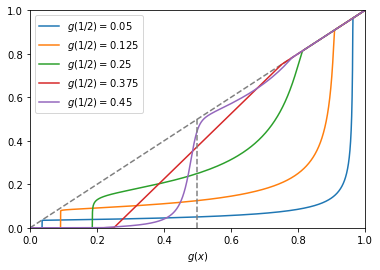

In [8]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color='grey')
lin = torch.load('da_linspace.pt').cpu()[::100]
for g_05 in g_05s:
    sol = torch.load(f'da_inverse_ask_{g_05}.pt').cpu()[::100]
    plt.plot(lin, sol, '-', label=f'$g(1/2)={g_05}$')
plt.plot([.5, .5], [0, .5], '--', color='grey')
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.xlabel('$x$'); plt.xlabel('$g(x)$')
plt.legend()
plt.show()